In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
import os
os.getcwd()

'E:\\Spyder python\\Python-Machine-Learning-master\\Dataset'

In [18]:
os.chdir('E:\Spyder python\Python-Machine-Learning-master\Dataset')

In [19]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [20]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


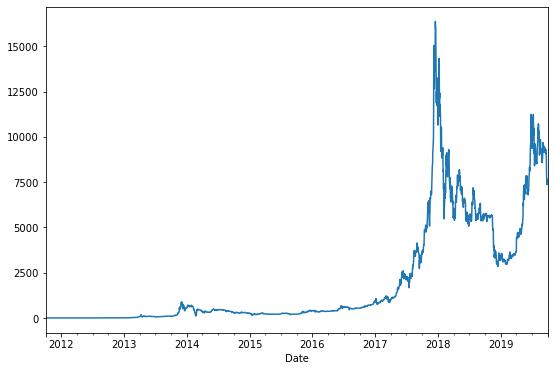

In [21]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [22]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

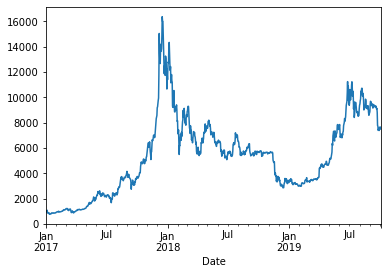

In [23]:
 bitcoin['2017':'2019']['Close'].plot()

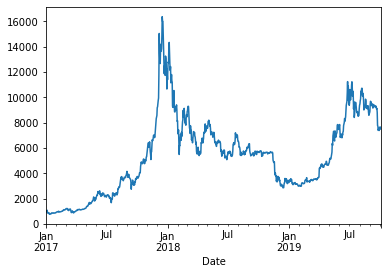

In [24]:
bitcoin.loc['2017':'2019','Close'].plot()

In [25]:
pd.to_datetime('2019/03/20')

Timestamp('2019-03-20 00:00:00')

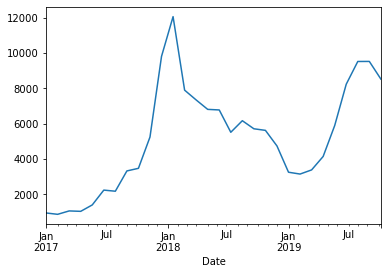

In [26]:
bitcoin.loc['2017':'2019','Close'].resample('5W').mean().plot()
plt.show()

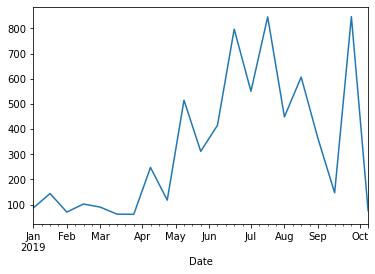

In [27]:
bitcoin.loc['2019','Close'].resample('2W').std().plot()
plt.show()

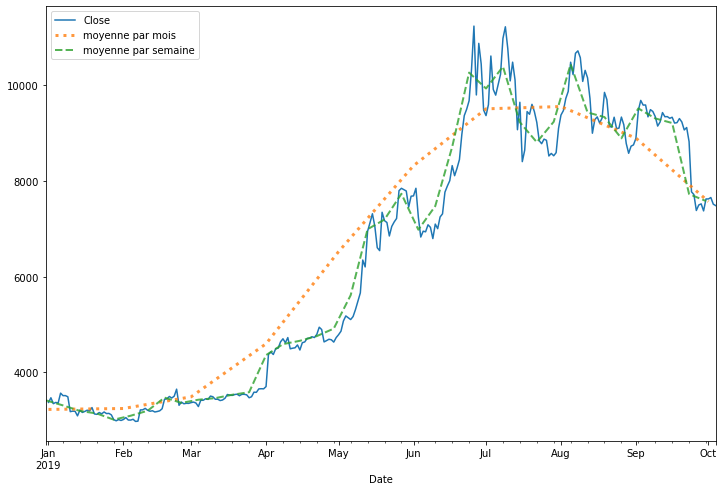

In [28]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

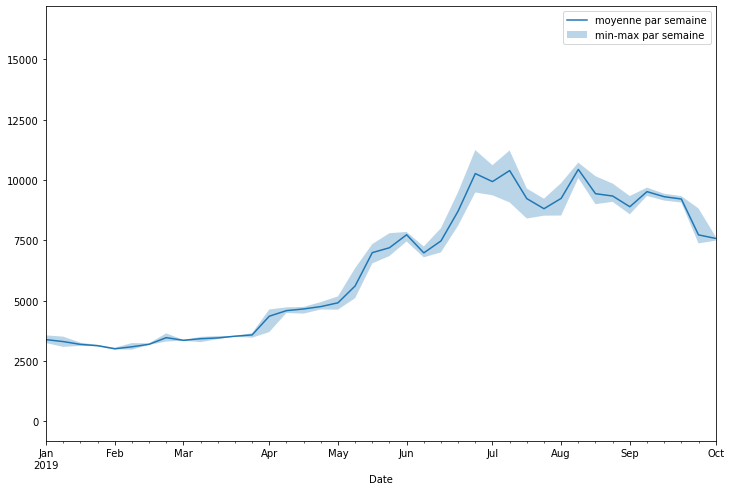

In [29]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.3, label='min-max par semaine')

plt.legend()
plt.show()

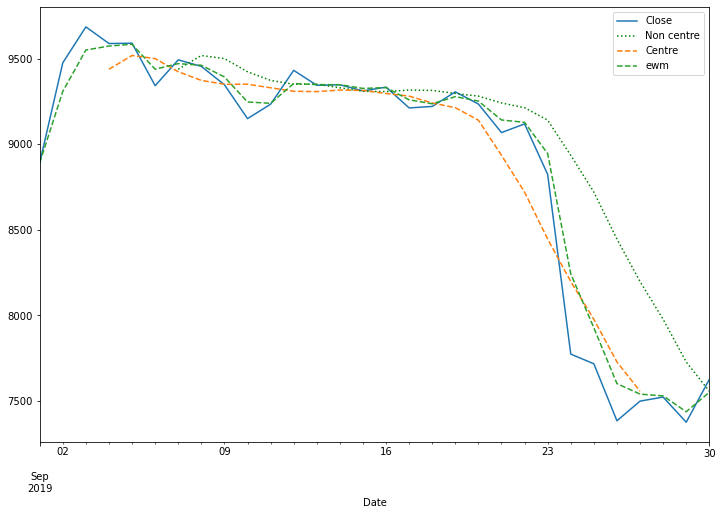

In [30]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7,).mean().plot(label='Non centre',ls=':',c='g')
bitcoin.loc['2019-09', 'Close'].rolling(window=7,center=True).mean().plot(label='Centre',ls='--')
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm',ls='--')
plt.legend()
plt.show()

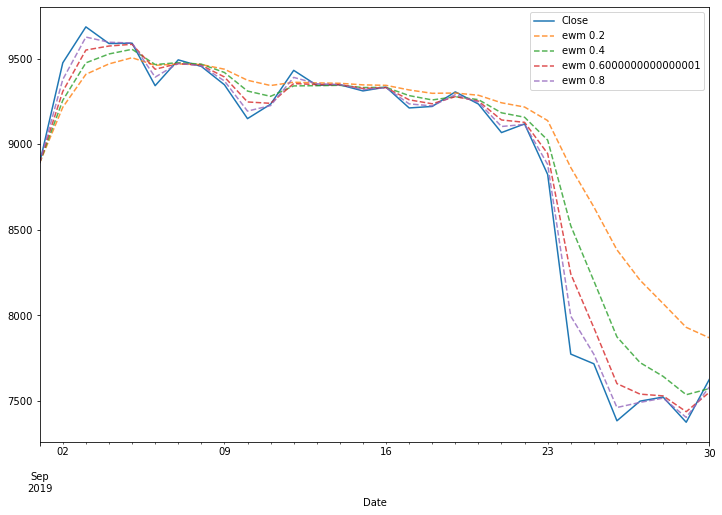

In [31]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha = 0.8)
plt.legend()
plt.show()

In [32]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [33]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ABDFDD9A0>,
      dtype=object)

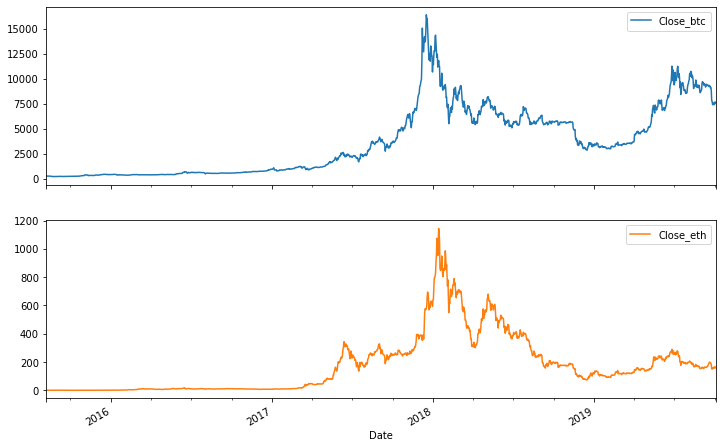

In [34]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12,8))

In [35]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.791416
Close_eth,0.791416,1.000000


In [53]:
data = bitcoin.copy()
bitcoin['Buy'] = np.zeros(len(bitcoin))
bitcoin['Sell'] = np.zeros(len(bitcoin))

data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()

data.loc[data['Close'] > data['RollingMax'], 'Buy'] = 1
data.loc[data['Close'] < data['RollingMin'], 'Sell'] = -1

In [47]:
len(bitcoin)

2923

In [48]:
bitcoin.loc['2019','Close'][100]

4492.450195

In [49]:
max_28 = bitcoin.loc['2019', 'Close'].rolling(window=28,center=True).max()

In [50]:
max_28[100]

4943.890136999999

In [51]:
bitcoin['Close']['2019']

Date
2019-01-01    3372.090088
2019-01-02    3468.399902
2019-01-03    3345.330078
2019-01-04    3370.939941
2019-01-05    3359.159912
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 277, dtype: float64

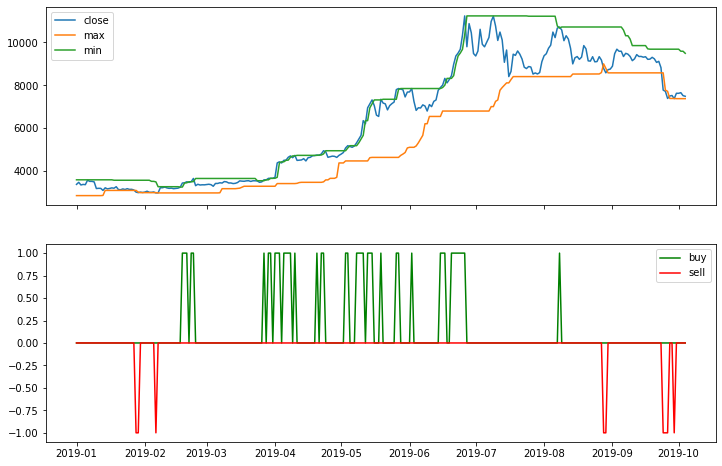

In [54]:
start = '2019'
end = '2019'

fig, ax = plt.subplots(2, figsize=(12,8), sharex=True)

ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'max', 'min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

In [13]:
data['Buy']['2019'][99]

nan